## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import DBSCAN
from sklearn.cluster import DBSCAN
from itertools import product

In [2]:
#import normalized data
customers_normal = pd.read_csv('data_imgs/customers_normal.csv')
customers_normal.head()

,income,age,gender,marital_status
0,0.107091,0.120215,-1.125463,0.086460
1,-0.775606,1.468102,-1.125463,0.086460
2,-0.236233,-0.311109,0.888523,-1.035942
3,1.078893,0.551539,0.888523,-1.035942
4,0.938258,0.821116,0.888523,2.331263


### Visualizing data

Text(0, 0.5, 'Income')

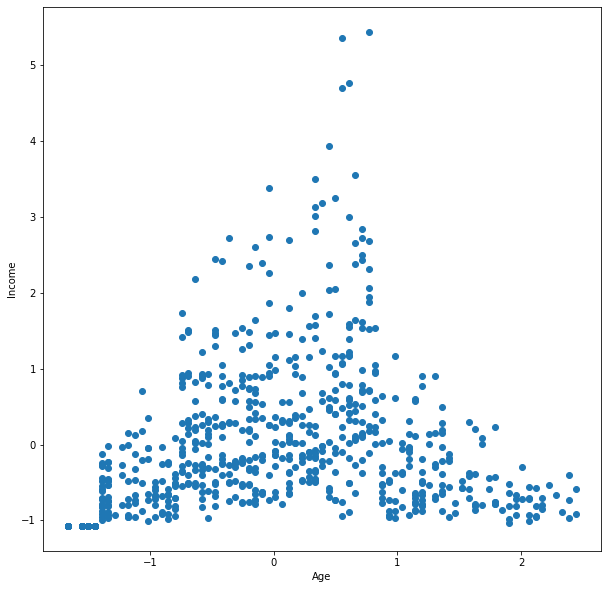

In [3]:
#sample plot
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(customers_normal.age, customers_normal.income)
ax.set_xlabel('Age')
ax.set_ylabel('Income')

## Sample

In [4]:
age_income = np.asarray(customers_normal.loc[:,['income', 'age']])
age_income

array([[ 0.10709118,  0.12021489],
       [-0.77560585,  1.4681017 ],
       [-0.23623257, -0.31110889],
       ...,
       [ 1.69454581,  0.33587678],
       [-0.39195216, -0.36502436],
       [-0.2666268 , -1.38941833]])

In [5]:
#custom function for creating graphs of different combinations
def DBSCAN_test(data, combination, graph_number):
    """Number of figs (subplot rows * subplot columns) must equal combos length for proper mapping
    figsize should be a list with two integers
    data and combos should be nparrays, data with two elements
    
    df = np.array([1, 2, 3, 4], [3, 4, 5, 6])
    combination = np.array([0.1, 0.1], [0.1, 1], [0.1, 20], [5, 0.1], [5, 1], [5, 20])
    dimension = math.sqrt(len(combination))
    ex: DBSCAN_test(df, combination, [dimension, dimension])
            --> output: supblot visual of input shape with DBSCAN outcomes plotted 
            for each combination
    """
    
    fig, axes = plt.subplots(graph_number[0], graph_number[1], figsize=(12, 12))
    fig.tight_layout()

    # Plot the data using one of Matplotlib's plotting functions
    for i in range(len(combination)):
        db = DBSCAN(eps=combination[i][0],
                    min_samples=combination[i][1],
                    metric='euclidean')
        
        data_db = db.fit_predict(data)

        # Plot the data using one of Matplotlib's plotting functions
         #create empty centroid lists
        X_centroids = []
        Y_centroids = []
    
        #append each new cluster mean for each iteration
        for cluster in set(data_db):
            x = data[data_db == cluster,0]
            y = data[data_db == cluster,1]
            X_centroids.append(np.mean(x))
            Y_centroids.append(np.mean(y))
        
            #visualize    
            axes.flat[i].scatter(x, y, s=50, marker='s', label=f"cluster {cluster}")
            axes.flat[i].set_title(combos[i])

In [6]:
#defining parameters
eps = [0.2, 0.3]
min_samples = [5, 7, 10, 12]
#making combinations
combos = list(product(eps, min_samples))
len(combos) #in this case it's 8

8

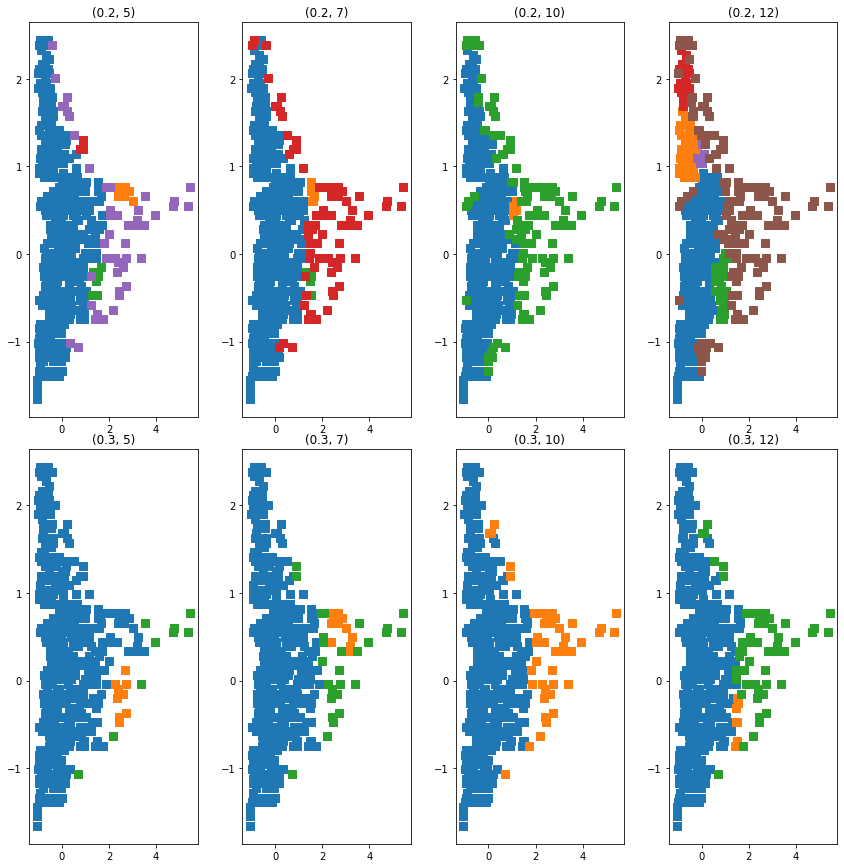

In [7]:
DBSCAN_test(age_income, combos, [2, 4]) 

## Whole set

#### DBSCAN

In [8]:
#now lets try DBSCAN
db = DBSCAN(eps=1.2,
            min_samples=20,
            metric='euclidean')

y_db = db.fit_predict(customers_normal.values)
#length of db should correspond with customer row #
len(y_db), customers_normal.shape

(714, (714, 4))

In [9]:
#concatinate clustering and data
db_data = pd.concat([customers_normal,pd.DataFrame(y_db)], axis=1)
db_data  = db_data.rename(columns= {0: 'cluster'})

db_data.value_counts('cluster')

cluster
 1    391
 0    290
-1     33
dtype: int64

#### Hierarchy Cluster

In [10]:
#import needed libraries
from sklearn.cluster import AgglomerativeClustering

#cluster hierarchy
import scipy.cluster.hierarchy as sch

In [11]:
#let's plot the dendrogram
def plot_dendrogram(X, method='ward'):
   #let's plot the data we just generated
    fig, ax = plt.subplots(figsize=(12,8))

    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

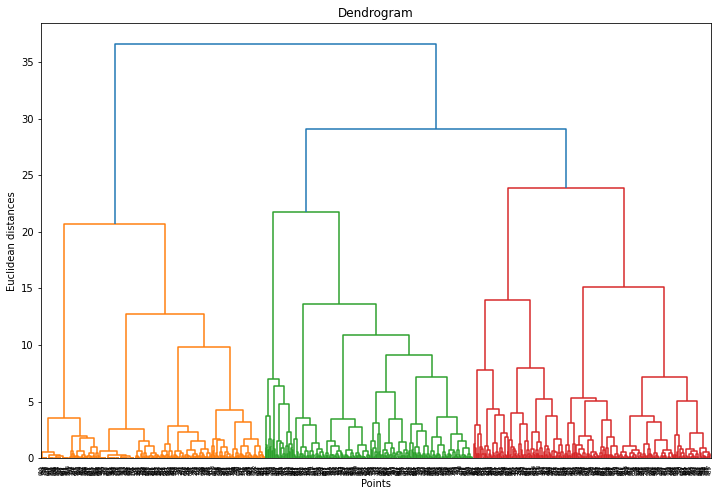

In [12]:
#run function
plot_dendrogram(customers_normal.values)

In [13]:
#create an agglomerative object defining linkage
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters=5)
#fit and predict
y_hc = ac.fit_predict(customers_normal.values)

#### K-means

In [14]:
#import
from sklearn.cluster import KMeans

In [15]:
#function to calculate distortion for multiple k values and plot the result
def plot_distortion(X, max_clusters = 10):
    #empty object to distore distortion
    distortions = []
    
    #iterate through each number, initialize and run kmeans, append distortion
    for i in range(1, max_clusters+1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        #.inertia_ attribute retrieves distortions
        distortions.append(km.inertia_)
    
    #visualize
    plt.plot(range(1, max_clusters+1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')  
    plt.show()

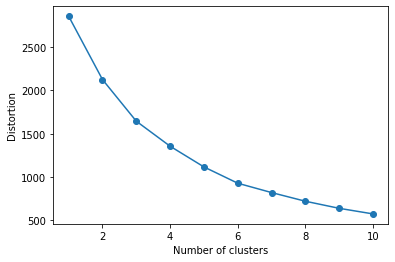

In [16]:
#run function with generated data
plot_distortion(customers_normal, max_clusters=10) 

In [17]:
#initialize KMeans
km = KMeans(n_clusters=5, n_init=10, random_state=0)
#fit and predict
y_km = km.fit_predict(customers_normal)

## Bar Charts

Clusters are colored, inputted based on percentage of total data points they capture

In [18]:
#concatinate clustering and data
db_data = pd.concat([customers_normal,pd.DataFrame(y_db)], axis=1)
db_data  = db_data.rename(columns= {0: 'cluster'})

db_data.value_counts('cluster')

cluster
 1    391
 0    290
-1     33
dtype: int64

In [19]:
db_clustered = db_data.groupby('cluster').mean()
db_clustered

,income,age,gender,marital_status
cluster,,,,
-1,1.863078,0.357116,-0.637224,1.514971
0,0.043934,-0.017734,-1.125463,-0.149632
1,-0.189827,-0.016987,0.888523,-0.016882


In [20]:
db_clustered.columns

Index(['income', 'age', 'gender', 'marital_status'], dtype='object')

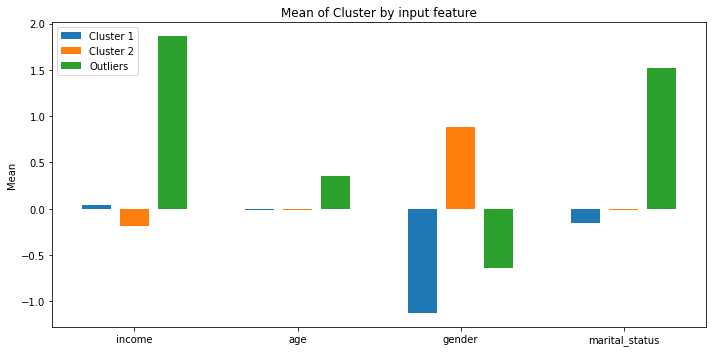

In [21]:
x = np.arange(len(db_clustered.columns))
width = 0.35
labels = list(db_clustered.columns)

#sample plot
fig, ax = plt.subplots(figsize=(10,5))

rects1 = ax.bar(x - 2*(width/3), db_clustered.loc[0].values, width/2, label='Cluster 1')
rects2 = ax.bar(x, db_clustered.loc[1].values, width/2, label='Cluster 2')
rects3 = ax.bar(x + 2*(width/3), db_clustered.loc[-1].values, width/2, label='Outliers')

ax.set_ylabel('Mean')
ax.set_title('Mean of Cluster by input feature')
ax.set_xticks(x)
ax.set_xticklabels( (db_clustered.columns) )


ax.legend()
fig.tight_layout()

In [22]:
hc_data = pd.concat([customers_normal,pd.DataFrame(y_hc)], axis=1)
hc_data  = hc_data.rename(columns= {0: 'cluster'})

hc_clustered = hc_data.groupby('cluster').mean()
hc_clustered.head()

,income,age,gender,marital_status
cluster,,,,
0,-0.548601,-0.901923,0.366067,-0.787041
1,-0.099083,0.167460,0.099539,1.949415
2,0.133921,0.744736,0.888523,0.014511
3,0.160559,0.371820,-1.125463,-0.153220
4,2.966920,0.391589,-0.655533,0.872141


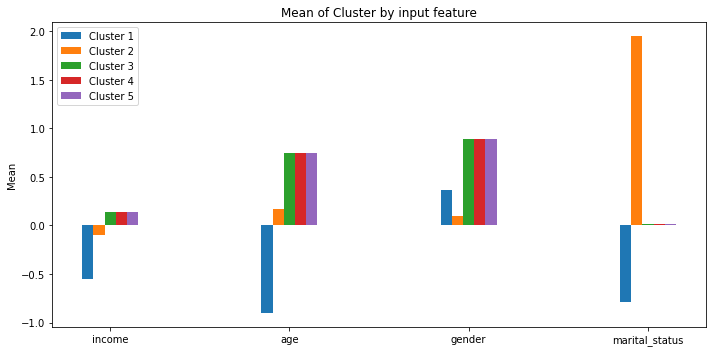

In [23]:
x = np.arange(len(hc_clustered.columns))
width = 0.25
labels = list(hc_clustered.columns)

#sample plot
fig, ax = plt.subplots(figsize=(10,5))

rects1 = ax.bar(x - 2*(width/4), hc_clustered.loc[0].values, width/4, label='Cluster 1')
rects2 = ax.bar(x - (width/4), hc_clustered.loc[1].values, width/4, label='Cluster 2')
rects3 = ax.bar(x, hc_clustered.loc[2].values, width/4, label='Cluster 3')
rects4 = ax.bar(x + (width/4), hc_clustered.loc[2].values, width/4, label='Cluster 4')
rects5 = ax.bar(x + 2*(width/4), hc_clustered.loc[2].values, width/4, label='Cluster 5')

ax.set_ylabel('Mean')
ax.set_title('Mean of Cluster by input feature')
ax.set_xticks(x)
ax.set_xticklabels( (hc_clustered.columns) )


ax.legend()
fig.tight_layout()

## Radar Chart

In [24]:
def radar_plot(data, cluster, title = "Clustering"):
    #concatinate clustering and data
    data_cluster = pd.concat([data,pd.DataFrame(cluster)], axis=1)
    data_cluster = data_cluster.rename(columns= {0: 'cluster'})
    #group by cluster with means and save to new frame
    clustered = data_cluster.groupby('cluster').mean()
    #generate category labels
    categories = [*clustered.columns, clustered.columns[0]]

    #empty object for defining groups
    radar = []
    for i in range(len(clustered)):
        radar.append([*clustered.iloc[i], clustered.iloc[i, 0]])
    
    #label location for radar plot
    label_loc = np.linspace(start=0, stop=2 * np.pi, 
                            num=len(radar[0]))
    #initiate plot
    plt.figure(figsize=(8,8))
    plt.subplot(polar = True)
    
    #loop through every cluster
    for i in range(len(radar)):
        #if there are outliers (ex with DBSCAN) id them
        if clustered.index[i] < 0:
            plt.plot(label_loc, radar[i], label=f"Outliers")
        #else plot as cluster
        else: 
            plt.plot(label_loc, radar[i], label=f"Cluster {i}")
    
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)

    plt.title(title)
    plt.legend()
    plt.show()

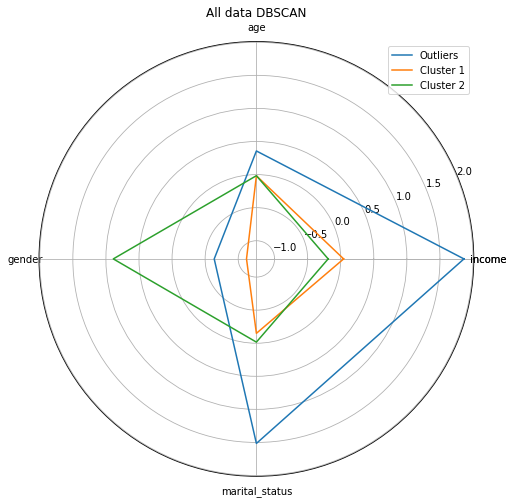

In [25]:
radar_plot(customers_normal, y_db, 'All data DBSCAN')

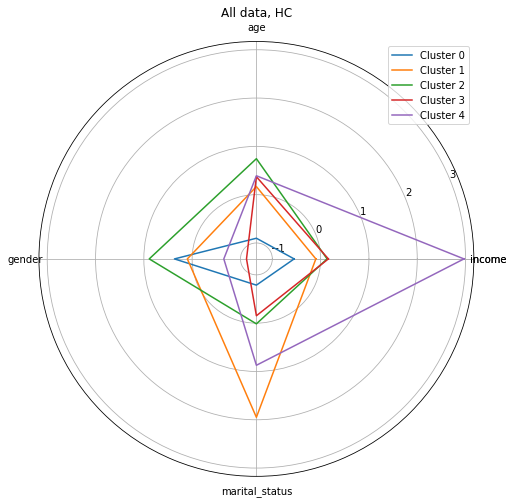

In [26]:
radar_plot(customers_normal, y_hc, 'All data, HC')

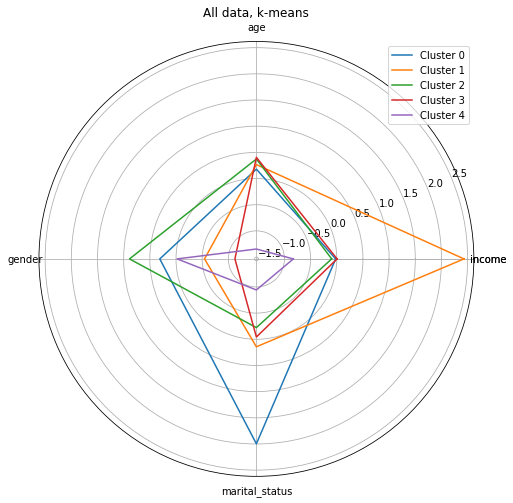

In [27]:
radar_plot(customers_normal, y_km, 'All data, k-means')

### Optimization

Using the tools I've developped let's generate explore different feature inputs

In [30]:
#different data
trifecta = customers_normal[['income', 'age', 'gender']]
personal = customers_normal[['age', 'gender', 'marital_status']]

labels = ['trifecta', 'personal']
different_data = [trifecta, personal]

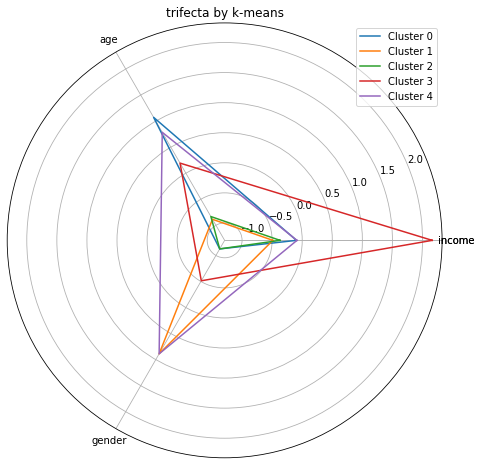

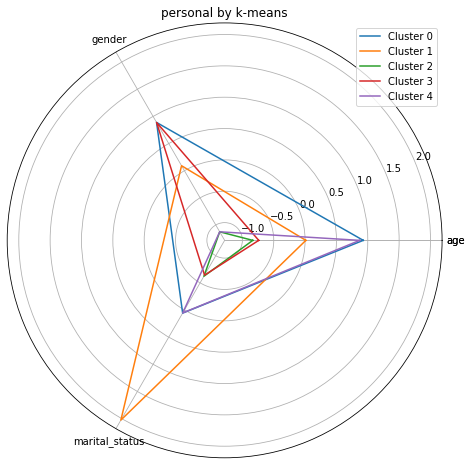

In [31]:
for i in range(len(different_data)):
    #initialize KMeans
    km = KMeans(n_clusters=5, n_init=10, random_state=0)
    #fit and predict
    y_km = km.fit_predict(different_data[i])
    
    radar_plot(different_data[i], y_km, f"{str(labels[i])} by k-means")

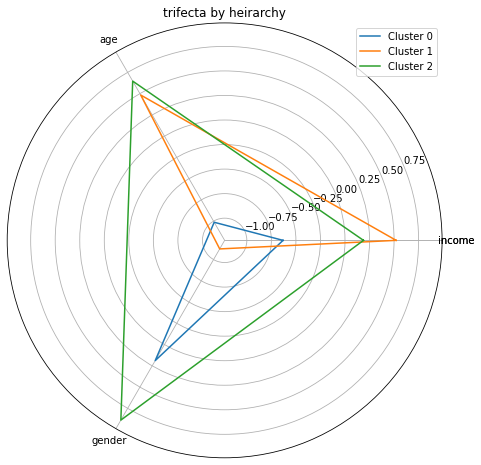

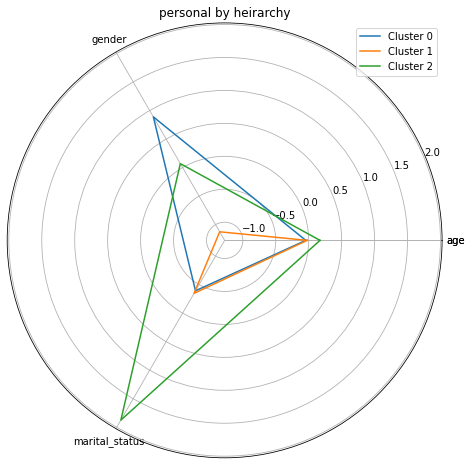

In [32]:
n_clusters = [3, 3, 4] #used dendrograms

for i in range(len(different_data)):
    #initialize KMeans
    hc = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters=n_clusters[i])
    #fit and predict
    y_hc = hc.fit_predict(different_data[i])
    
    radar_plot(different_data[i], y_hc, f"{str(labels[i])} by heirarchy")
    

 1    392
 0    310
-1     12
dtype: int64


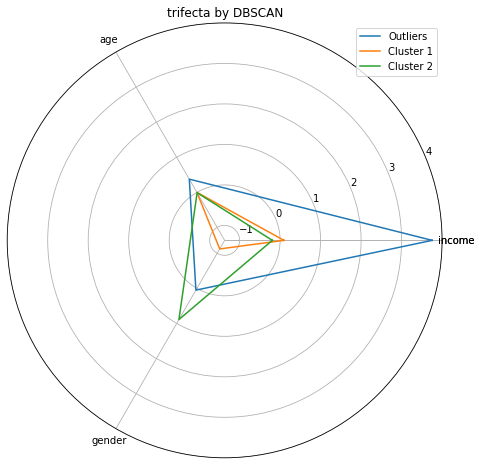

 3    189
 0    164
 1    139
 4    100
 2     39
-1     33
 6     27
 5     23
dtype: int64


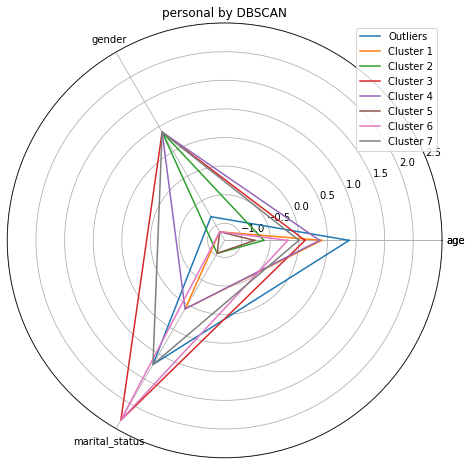

In [33]:
for i in range(len(different_data)):
    db = DBSCAN(eps=0.7,
            min_samples=12,
            metric='euclidean')

    y_db = db.fit_predict(different_data[i].values)
    print(pd.DataFrame(y_db).value_counts())
    radar_plot(different_data[i], y_db, f"{str(labels[i])} by DBSCAN")
    

## PCA

In [34]:
from sklearn.decomposition import PCA

In [36]:
# Applying the PCA to the original dataset
pca = PCA() #Instatiating

pca.fit(customers_normal)

customers_pca = pca.transform(customers_normal)
pca_df = pd.DataFrame(customers_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

pca.explained_variance_ratio_ #automatically generates 5 pretty large weights

array([0.37036591, 0.26405629, 0.19030607, 0.17527174])

In [37]:
#just take first two for visualization purposes
pca = PCA(n_components = 2) #Instatiating

pca.fit(customers_normal)

pca_2 = pca.transform(customers_normal)
pca2_df = pd.DataFrame(pca_2, columns = ['PC1', 'PC2'])
pca.explained_variance_ratio_ #automatically generates 5 pretty large weights

array([0.37036591, 0.26405629])

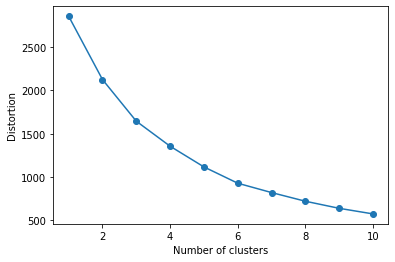

In [38]:
#elbow function
plot_distortion(customers_pca, max_clusters=10) #7?

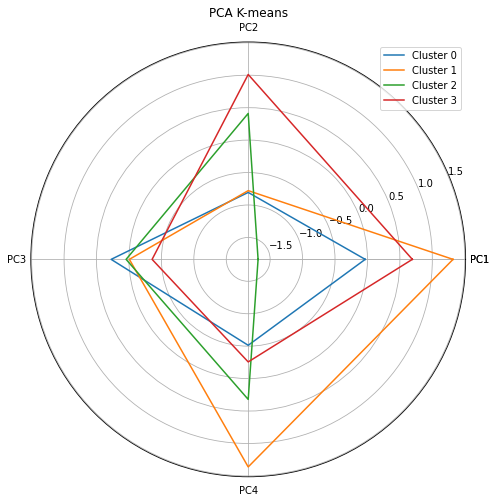

In [39]:
#initialize KMeans
km = KMeans(n_clusters=4, n_init=10, random_state=0)
#fit and predict
y_km = km.fit_predict(customers_pca)
radar_plot(pca_df, y_km, 'PCA K-means')

In [40]:
#now lets try DBSCAN
db = DBSCAN(eps=1.2,
            min_samples=20,
            metric='euclidean')

y_db = db.fit_predict(pca_df.values)

pd.DataFrame(y_db, columns=['cluster']).value_counts('cluster')

cluster
 1    391
 0    290
-1     33
dtype: int64

In [41]:
#create an agglomerative object defining linkage
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters=4)
#fit and predict
y_hc = ac.fit_predict(pca_df.values)

In [42]:
compare_pca = pd.concat([pca2_df,
           pd.DataFrame(y_km, columns=['kmeans']),
           pd.DataFrame(y_db, columns=['dbscan']),
           pd.DataFrame(y_hc, columns=['heirarchy'])],
          axis=1)
compare_pca.head()

,PC1,PC2,kmeans,dbscan,heirarchy
0,0.376843,0.942408,3,0,0
1,0.676335,0.279159,3,0,0
2,-1.072877,-0.458904,0,1,1
3,0.133860,-0.272043,0,1,1
4,2.193026,-1.346723,1,1,3


kmeans
0    250
3    210
2    157
1     97
dtype: int64

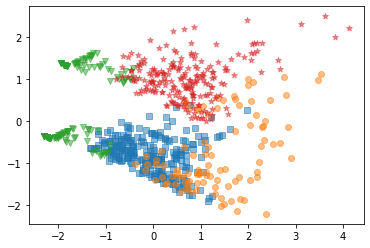

In [43]:
fig, ax = plt.subplots()
markers = ['s', 'o', 'v', '*', '+']

for i in np.unique(y_km): 
    ax.scatter(pca2_df.loc[compare_pca['kmeans'] == i, 'PC1'], 
               pca2_df.loc[compare_pca['kmeans'] == i, 'PC2'], 
               marker=markers[i], alpha = 0.5)
compare_pca.value_counts('kmeans')

dbscan
 1    391
 0    290
-1     33
dtype: int64

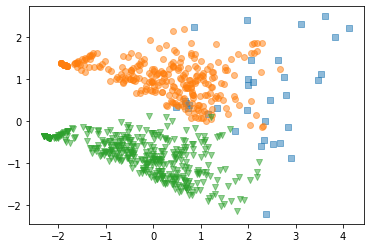

In [44]:
fig, ax = plt.subplots()

for i in range(len(np.unique(y_db))): 
    ax.scatter(pca2_df.loc[compare_pca['dbscan'] == np.unique(y_db)[i], 'PC1'], 
               pca2_df.loc[compare_pca['dbscan'] == np.unique(y_db)[i], 'PC2'], 
               marker=markers[i], alpha = 0.5)
compare_pca.value_counts('dbscan')

heirarchy
1    239
0    222
2    156
3     97
dtype: int64

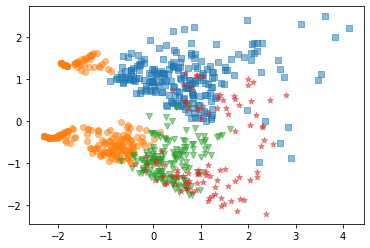

In [45]:
fig, ax = plt.subplots()

for i in range(len(np.unique(y_hc))): 
    ax.scatter(pca2_df.loc[compare_pca['heirarchy'] == np.unique(y_hc)[i], 'PC1'], 
               pca2_df.loc[compare_pca['heirarchy'] == np.unique(y_hc)[i], 'PC2'], 
               marker=markers[i], alpha = 0.5)
    
compare_pca.value_counts('heirarchy')